<a href="https://colab.research.google.com/github/anicelysantos/book-python-para-analise-de-dados/blob/main/plotagem_visualizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Python para análise de dados - Capítulo 9***



# Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
from numpy.random import randn

In [4]:
from datetime import datetime

In [5]:
#Importar para salvar figuras em objetos do tipo artigo
from io import BytesIO

In [6]:
import seaborn as sns

# Introdução rápida à API da matplotlib

In [ ]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

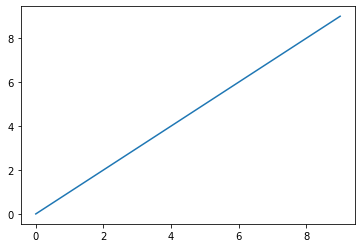

In [ ]:
plt.plot(data)

**Figuras e subplotagens**

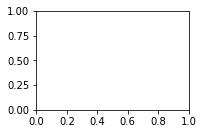

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)

In [ ]:
ax2 = fig.add_subplot(2,2,2)


In [ ]:
ax3 = fig.add_subplot(2,2,3)

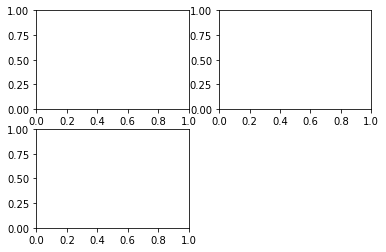

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

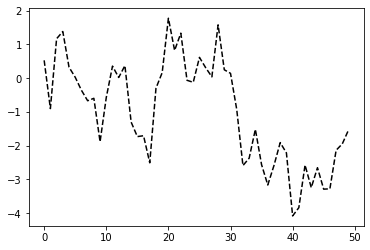

In [ ]:
#O 'k--' inclui uma linha tracejada
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [ ]:
_=ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [ ]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf3a2f7890>,
      dtype=object)

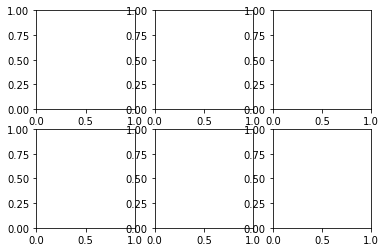

In [ ]:
fig, axes = plt.subplots(2,3)
axes

**Ajustanto o espaçamento em torno das subplotagens**

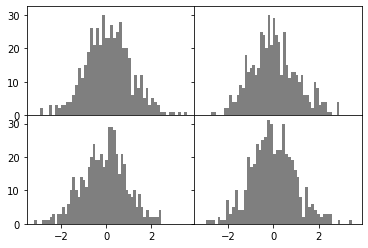

In [ ]:
fig, axes = plt.subplots(2,2, sharex=True, sharey=True) 
for i in range(2):
  for j in range(2):
    axes[i,j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)


**Cores, marcadores e estilos de linha**

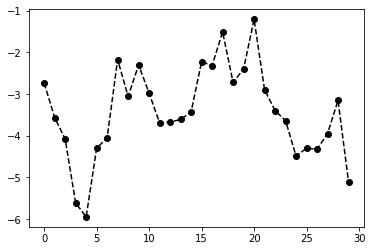

In [ ]:
plt.plot(randn(30).cumsum(), 'ko--')

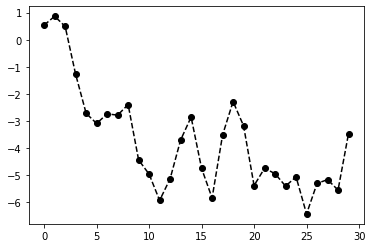

In [ ]:
#outra forma de escrever o mesmo código
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed',marker='o')

In [ ]:
data = np.random.randn(30).cumsum()

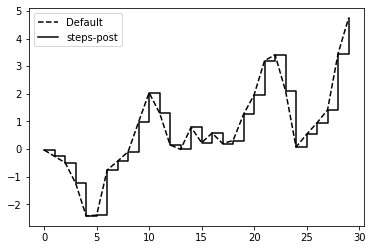

In [ ]:
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

**Definindo os tiques,os rótulos dos eixos e os rótulos dos tiques**

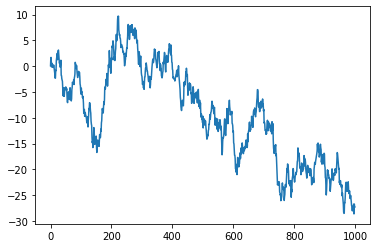

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

Text(0.5, 0, 'Stages')

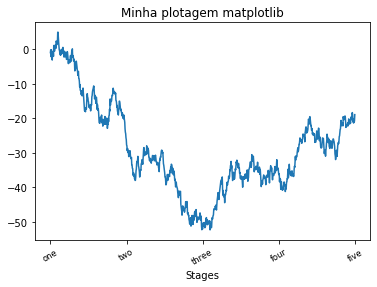

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0,250,500,750,1000])

#rotation gira os rótulos do eixo, no caos do exemplo do eixo x. Set_label coloca nomes no eixo
labels = ax.set_xticklabels(['one','two','three','four','five'], rotation=30, fontsize='small')

#Set_title define o título da plotagem
ax.set_title('Minha plotagem matplotlib')

ax.set_xlabel('Stages')

[Text(0.5, 0, 'Stages'), Text(0.5, 1.0, 'Minha plotagem matplotlib')]

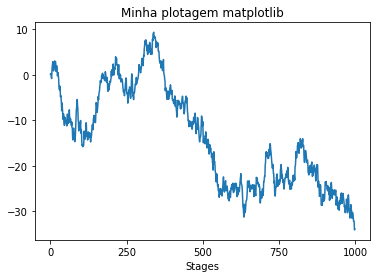

In [ ]:
#Outro jeito de fazer a mesma plotagem
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0,250,500,750,1000])

props = {
    'title': 'Minha plotagem matplotlib',
    'xlabel':'Stages'
}
ax.set(**props)

**Acrescentando legendas**

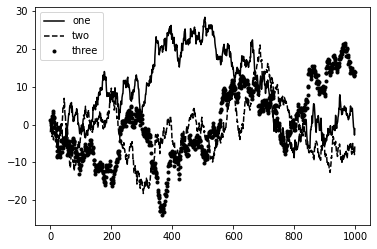

In [ ]:
fig = plt.figure(); ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000). cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

#cria uma legenda
ax.legend(loc='best')

**Anotações e desenhos em uma subplotagem**

Text(0.5, 1.0, 'Datas importantes da crise financeira entre 2008-2009')

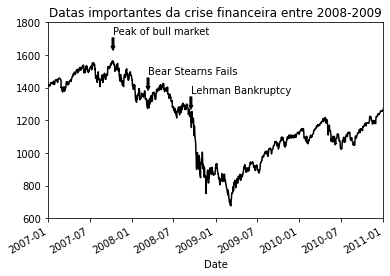

In [ ]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)

data = pd.read_csv('/content/drive/MyDrive/dados_pandas/pydata-book-2nd-edition/examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

#criar anotações no gráfico
crisis_data = [
               (datetime(2007,10,11), 'Peak of bull market'),
               (datetime(2008, 3, 12), 'Bear Stearns Fails'),
               (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
  #desenhando as setas
  ax.annotate(label, xy=(date, spx.asof(date) + 75), xytext= (date, spx.asof(date) + 225),
              arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
              horizontalalignment='left', verticalalignment='top')

#Faz um zoom no período de 2007 a 2011
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

#adicionando título
ax.set_title('Datas importantes da crise financeira entre 2008-2009')

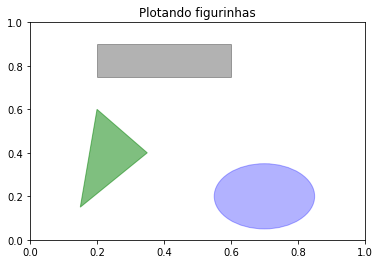

In [ ]:
fig = plt.figure()
#dimensões da plotagem
ax = fig.add_subplot(1,1,1)

#dimensões das formas geométricas
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

#incluindo título
ax.set_title('Plotando figurinhas')

**Salvando plotagens em arquivos**

In [ ]:
#salvando em svg
plt.savefig('/content/drive/MyDrive/dados_pandas/figpath.svg')

#salvando um png com o mínimo de espaços em branco
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [ ]:
#Slavando figuras em objeto do tipo arquivo
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

# Plotagem com o pandas e o seaborn

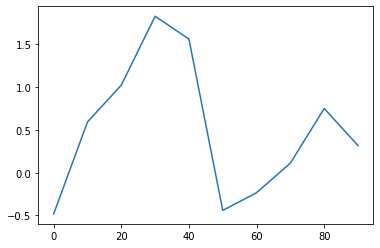

In [7]:
#plot cria um gráfico de linha
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))
s.plot()

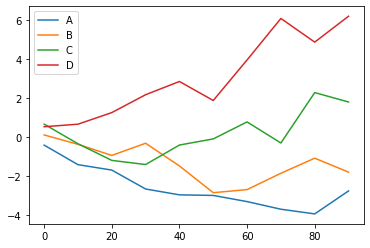

In [8]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0), columns=['A','B','C','D'], index=np.arange(0,100,10))
df.plot()

**Plotagem de barras**

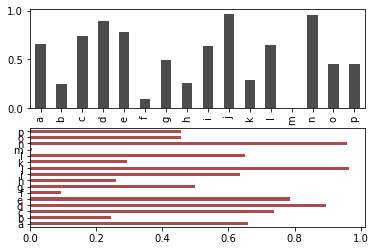

In [9]:
fig, axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)

data.plot.barh(ax=axes[1], color='darkred', alpha=0.7)

In [10]:
df = pd.DataFrame(np.random.rand(6,4), index=['one','two','three','four','five','six'], columns=pd.Index(['A','B','C','D'], name='Genus'))
df

Genus,A,B,C,D
one,0.521738,0.967743,0.684192,0.818475
two,0.840242,0.199932,0.520803,0.211868
three,0.331236,0.558411,0.917733,0.690395
four,0.274775,0.220069,0.860133,0.130375
five,0.587761,0.207640,0.025188,0.024734
six,0.487337,0.248877,0.673846,0.893115


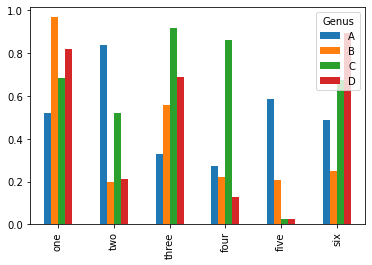

In [11]:
df.plot.bar()

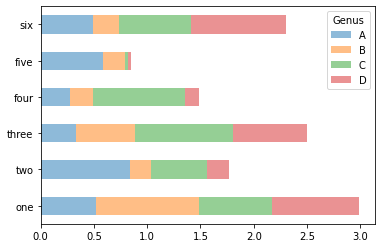

In [12]:
df.plot.barh(stacked=True, alpha=0.5)

In [13]:
tips = pd.read_csv('/content/drive/MyDrive/dados_pandas/pydata-book-2nd-edition/examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [14]:
party_counts = party_counts.loc[:, 2:5]
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


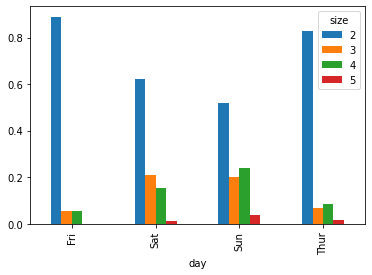

In [15]:
party_pcts.plot.bar()

In [16]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


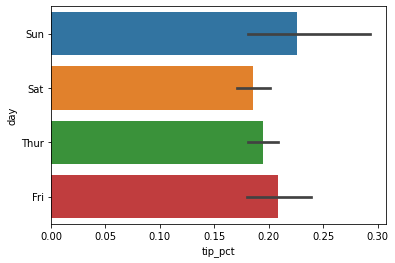

In [17]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

As linhas pretas representam o intervalo de confiança de 95%

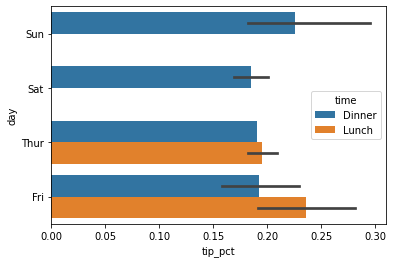

In [19]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

#outra opção de estilo
#sns.set(style='whitegrid')

**Histograma e plotagens de densidade**

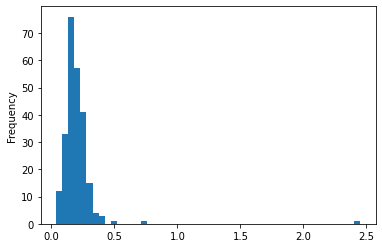

In [20]:
tips['tip_pct'].plot.hist(bins=50)



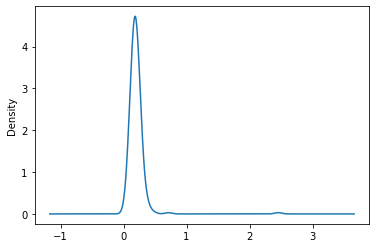

In [21]:
tips['tip_pct'].plot.density()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


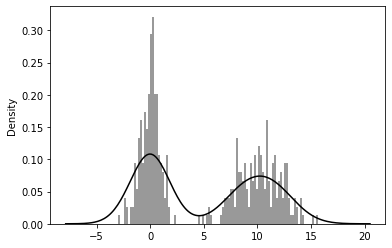

In [26]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)

values = pd.Series(np.concatenate([comp1, comp2]))

sns.distplot(values, bins=100, color='k')

**Plotagem de dispersão ou de pontos**